EMILIO FRAUSTO ORTIZ

In [1]:
def get_texts_from_file(path_data, path_labels):
    tr_txt = []  #aqui van los tuits 
    tr_y   = []  #aqui van las etiquetas

    with open(path_data, "r", encoding = "utf-8") as f_data:
        for twitt in f_data:
            tr_txt += [twitt]

    with open(path_labels, "r", encoding = "utf-8") as f_labels:

        
        for label in f_labels:
            tr_y   += [label]

    return tr_txt , tr_y

In [2]:
tr_txt, tr_y = get_texts_from_file("mex20_train.txt","mex20_train_labels.txt")

print(len(tr_txt))


5278


In [3]:
len(tr_y)

5278

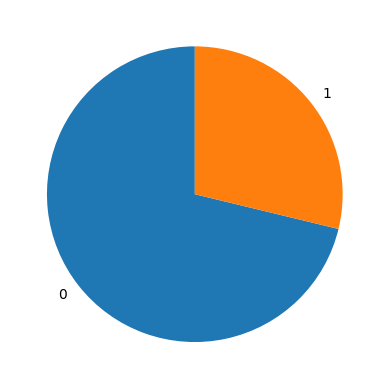

In [4]:
import matplotlib.pyplot as plt
labels = [int(x.strip()) for x in tr_y]

zeros = labels.count(0)
ones = labels.count(1)

plt.pie([zeros,ones],labels=["0","1"],startangle=90)
plt.show()

In [5]:
tr_txt[61].split()

['🤣🤣🤣',
 'mi',
 'vida,',
 'eres',
 'la',
 'mejor!',
 'Dí',
 'lo',
 'q',
 'digas',
 'y',
 'a',
 'la',
 'verga',
 'los',
 'haters',
 'heteropatriarcanormados!',
 'Block',
 'y',
 'be',
 'happy!',
 '😘']

In [6]:
import nltk

nltk.word_tokenize(tr_txt[61])

['🤣🤣🤣',
 'mi',
 'vida',
 ',',
 'eres',
 'la',
 'mejor',
 '!',
 'Dí',
 'lo',
 'q',
 'digas',
 'y',
 'a',
 'la',
 'verga',
 'los',
 'haters',
 'heteropatriarcanormados',
 '!',
 'Block',
 'y',
 'be',
 'happy',
 '!',
 '😘']

In [7]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

In [8]:
tokenizer.tokenize(tr_txt[61])

['🤣',
 '🤣',
 '🤣',
 'mi',
 'vida',
 ',',
 'eres',
 'la',
 'mejor',
 '!',
 'Dí',
 'lo',
 'q',
 'digas',
 'y',
 'a',
 'la',
 'verga',
 'los',
 'haters',
 'heteropatriarcanormados',
 '!',
 'Block',
 'y',
 'be',
 'happy',
 '!',
 '😘']

In [9]:
tokenizer.tokenize(tr_txt[50])

['¡', 'Apúntale', 'cabrón', '!', '📄', '🖋', '️']

In [10]:
import nltk

word_world = []

for twuit in tr_txt:
    word_world += tokenizer.tokenize(twuit)

In [11]:
len(word_world)

97473

In [18]:
vocabulary = (set(word_world))

In [13]:
f_dic = nltk.FreqDist(word_world)

In [14]:
f_dic

FreqDist({',': 3016, 'de': 2915, 'que': 2829, '.': 2604, 'la': 2031, 'a': 1956, 'y': 1856, '!': 1435, 'no': 1430, '@USUARIO': 1399, ...})

In [15]:
len(f_dic)

15194

In [52]:
def sortFreqDist(freqdist):
    aux = [(freqdist[key], key) for key in freqdist]
    aux.sort()
    aux.reverse()
    return aux

In [54]:
V = sortFreqDist(f_dic)

In [56]:
v = V[:5000]

In [71]:
#Asegurar un orden en el diccionario
dict_indices = dict()

cont = 0
for weight, word in V:
    dict_indices[word] = cont
    cont += 1

In [78]:
import numpy as np

def build_bowl_tr(tr_txt, vocabulary, dict_indices):
    # El objetivo es construir la matriz BOW
    bowl = np.zeros((len(tr_txt), len(vocabulary)), dtype=int) #Matriz de BOWL

    # RELLENAR LA MATRIZ BOWL, cada renglon es un tuit y cada columna una palabra
    #Si la palabra aparece en el tuit, poner un uno
    count_doc = 0
    for tuit in tr_txt:
        fdist_doc = nltk.FreqDist(tokenizer.tokenize(tuit.lower())) #Tuit tokenizado
        for word in fdist_doc:
            if word in dict_indices:
                bowl[count_doc, dict_indices[word]] = 1 #rellenar
        count_doc += 1
    
    return bowl

In [79]:
bowl = build_bowl_tr(tr_txt, word_world, dict_indices)
print(bowl.shape)

(5278, 97473)


In [80]:
bowl

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

'@USUARIO @USUARIO @USUARIO Q se puede esperar del maricon de closet de la Yañez aun recuerdo esa ves q lo vi en zona rosa viendo quien lo levantada\n'